In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/augmentedDataWithoutStemming.csv')

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,Name,Genres,Summary
0,0,1,A Clockwork Orange,Science Fiction,alex teenager living near future england lead...
1,1,6,A Wizard of Earthsea,Children's literature,ged young boy gont one larger islands north a...
2,2,8,Blade Runner 3: Replicant Night,Science Fiction,living mars deckard acting consultant movie c...
3,3,9,Blade Runner 2: The Edge of Human,Science Fiction,beginning several months events blade runner ...
4,4,21,Children of Dune,Science Fiction,nine years emperor paul muad dib walked deser...
...,...,...,...,...,...
21864,21864,16414,Carver,Thriller,central character samuel carver ex assassin s...
21865,21865,16442,Rabies,Thriller,seth betimes 1980s height insensate war novel...
21866,21866,16542,The Bourne Imperative,Thriller,detailed background main character see jason ...
21867,21867,16551,Remote Control,Thriller,series follows character nick stone ex milita...


In [ ]:
X=df.Summary
Y=df.Genres

# SGD Classfier:

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
model = Pipeline([('vect', CountVectorizer(ngram_range=(1,3))),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])

accuracy = cross_val_score(model, X, Y, scoring='accuracy', cv = 10)
print(accuracy)

[0.87334248 0.86465478 0.87197074 0.87562872 0.87517147 0.87105624
 0.86694102 0.86648377 0.86877    0.8705398 ]


In [ ]:
d=[]
for i in range(10):
    d+=[[i+1,accuracy[i]]]
d+=[["Average",sum(accuracy)/10]]
d

[[1, 0.8733424782807498],
 [2, 0.8646547782350251],
 [3, 0.871970736168267],
 [4, 0.8756287151348879],
 [5, 0.8751714677640604],
 [6, 0.8710562414266118],
 [7, 0.8669410150891632],
 [8, 0.8664837677183356],
 [9, 0.8687700045724737],
 [10, 0.8705397987191217],
 ['Average', 0.8704559003108695]]

In [ ]:
accuracy_df=pd.DataFrame(d,columns=["fold","accuracy"])
accuracy_df

,fold,accuracy
0,1,0.873342
1,2,0.864655
2,3,0.871971
3,4,0.875629
4,5,0.875171
5,6,0.871056
6,7,0.866941
7,8,0.866484
8,9,0.868770
9,10,0.870540


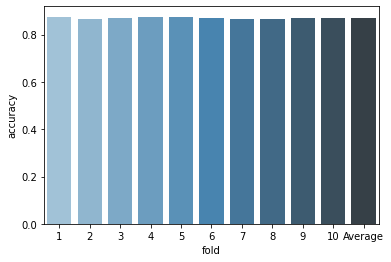

In [ ]:
ax = sns.barplot(x="fold",y="accuracy",
                 data=accuracy_df,palette="Blues_d")

# Linear SVC Classfier:

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
model = Pipeline([('vect', CountVectorizer(ngram_range=(1,3))),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(random_state=0, tol=1e-5)),
               ])

accuracy = cross_val_score(model, X, Y, scoring='accuracy', cv = 10)
print(accuracy)

[0.88980338 0.90534979 0.89986283 0.90946502 0.91037952 0.90809328
 0.90672154 0.9035208  0.91129401 0.89981702]


In [ ]:
d=[]
for i in range(10):
    d+=[[i+1,accuracy[i]]]
d+=[["Average",sum(accuracy)/10]]
d

[[1, 0.8898033836305441],
 [2, 0.9053497942386831],
 [3, 0.8998628257887518],
 [4, 0.9094650205761317],
 [5, 0.9103795153177869],
 [6, 0.9080932784636488],
 [7, 0.906721536351166],
 [8, 0.9035208047553727],
 [9, 0.9112940100594421],
 [10, 0.8998170173833486],
 ['Average', 0.9044307186564875]]

In [ ]:
accuracy_df=pd.DataFrame(d,columns=["fold","accuracy"])
accuracy_df

,fold,accuracy
0,1,0.889803
1,2,0.905350
2,3,0.899863
3,4,0.909465
4,5,0.910380
5,6,0.908093
6,7,0.906722
7,8,0.903521
8,9,0.911294
9,10,0.899817


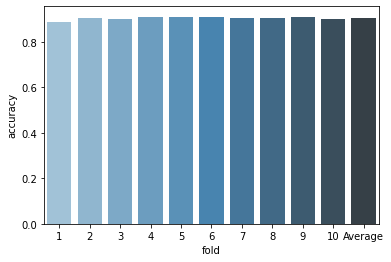

In [ ]:
ax = sns.barplot(x="fold",y="accuracy",
                 data=accuracy_df,palette="Blues_d")